In [3]:
# Load the dataset

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Build a voting classifier, composed of 3 different classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
svm_proba_clf = SVC(probability=True) # this is to enable predict_proba method for soft voting

voting_clf_hard = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),('svc', svm_clf)],
    voting='hard'
)

voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),('svc', svm_proba_clf)],
    voting='soft'
)

voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [15]:
# let's check out the accuracy

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf_hard, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.904
VotingClassifier 0.912


### Bagging method 

where the sampling with replacement is used for training same/different predictors and an aggregate (mode for classification and average for regression) is used

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1) # n_jobs tells sklearn how many CPU cores to use, -1 being all cores


bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.928


In [18]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


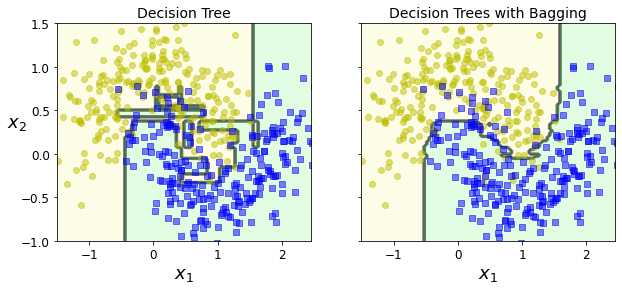

In [22]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

### Out of Bag (OOB) evaluation

In [23]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True) # OOB score True ensures the avaibility

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [27]:
# this is the score achived on the validation set, that was created due to sampling with replacement

bag_clf.oob_score_

0.8986666666666666

In [30]:
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.904

In [31]:
# to check the oob evalution of each instance 

bag_clf.oob_decision_function_

array([[0.38829787, 0.61170213],
       [0.32258065, 0.67741935],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08287293, 0.91712707],
       [0.37016575, 0.62983425],
       [0.00617284, 0.99382716],
       [0.99465241, 0.00534759],
       [0.97860963, 0.02139037],
       [0.80628272, 0.19371728],
       [0.01081081, 0.98918919],
       [0.74853801, 0.25146199],
       [0.84615385, 0.15384615],
       [0.96195652, 0.03804348],
       [0.04761905, 0.95238095],
       [0.        , 1.        ],
       [0.9804878 , 0.0195122 ],
       [0.93406593, 0.06593407],
       [1.        , 0.        ],
       [0.02547771, 0.97452229],
       [0.32738095, 0.67261905],
       [0.9281768 , 0.0718232 ],
       [1.        , 0.        ],
       [0.96078431, 0.03921569],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.65030675, 0.34969325],
       [0.

### Random Forest 

In [55]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [53]:
y_pred_rf = rnd_clf.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.92

In [54]:
# A similar setup with bagging would look like this 

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)


bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.92

In [56]:
# Extra Trees are also a good option with randomized thresholds and may perform better than RandomForest at times

### Feature Importance

In [57]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10496305024303643
sepal width (cm) 0.021002451182639954
petal length (cm) 0.41921921153180375
petal width (cm) 0.45481528704251983


### AdaBoost

In [58]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5) # SAMME is sklearn's multiclass version, when more than two classes, we need to use SAMME.R

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [59]:
y_ada_pred = ada_clf.predict(X_test)

accuracy_score(y_test, y_ada_pred)

0.896

### Gradient Boosting

In [60]:
# Let's create a basic quadratic dataset with some noise

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [67]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [63]:
# Let's train a second regressor on the residual errors

y2 = y - tree_reg1.predict(X)

tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [66]:
y2

array([-0.07199323,  0.06591133,  0.04248548, -0.19374408,  0.22041981,
        0.24930881, -0.00114735, -0.15222706, -0.13331807, -0.01877138,
        0.07437546,  0.1503149 , -0.22350214,  0.15034361,  0.18499381,
        0.22556424, -0.04370548, -0.13811059, -0.12927709, -0.06598606,
       -0.0712269 , -0.08485003,  0.00630109, -0.08171801, -0.18854512,
        0.0993776 ,  0.12988566, -0.16307213, -0.10600905, -0.0235881 ,
        0.00544086,  0.21082582, -0.08049446,  0.07220392,  0.02593255,
        0.16043495, -0.00602728,  0.12096847, -0.03135875, -0.09774359,
       -0.06096712, -0.18193024,  0.04661096,  0.01165776,  0.09054676,
       -0.08979502,  0.05293175, -0.1924505 , -0.08767772,  0.2839068 ,
        0.08343389,  0.0752132 ,  0.05589207, -0.08607633, -0.17234608,
        0.0087933 , -0.03289674,  0.17739276, -0.08642889,  0.04545908,
       -0.12555055,  0.01717459, -0.16368755, -0.12355051,  0.03177594,
       -0.05274012,  0.18286595,  0.15963461,  0.06821878,  0.22

In [65]:
# Let's train a thrird predictor the same way

y3 = y2 - tree_reg2.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [68]:
y3

array([ 0.01840471,  0.02599835,  0.00257251, -0.10334615,  0.06058178,
        0.08947079, -0.00114735, -0.19214004, -0.04292013, -0.05868436,
        0.07437546,  0.11040193, -0.26341512, -0.00949442,  0.02515578,
        0.06572621,  0.04669245, -0.04771265, -0.03887916,  0.02441188,
        0.01917103, -0.08485003,  0.09669902,  0.00867992, -0.09814719,
        0.05946462, -0.02995236, -0.0726742 , -0.01561112, -0.0235881 ,
        0.09583879,  0.0509878 , -0.08049446,  0.03229094, -0.01398043,
        0.12052198,  0.08437066,  0.12096847,  0.05903919, -0.00734565,
       -0.06096712, -0.0915323 ,  0.04661096, -0.02825521, -0.06929126,
        0.00060292,  0.14332968, -0.10205257,  0.00272022,  0.12406878,
        0.04352092,  0.03530023,  0.01597909, -0.12598931, -0.08194814,
       -0.03111968, -0.03289674,  0.01755473, -0.08642889,  0.13585701,
       -0.03515262, -0.14266343, -0.20360053, -0.03315258, -0.12806208,
        0.03765781,  0.02302793,  0.11972164,  0.06821878,  0.18

In [70]:
X_new = np.array([[0.8]])

In [71]:
# Now let's add up the three trees to make predictions

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [72]:
y_pred

array([0.75026781])

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [74]:
y_gbrt_pred = gbrt.predict(X_new)

In [75]:
y_gbrt_pred

array([0.75026781])

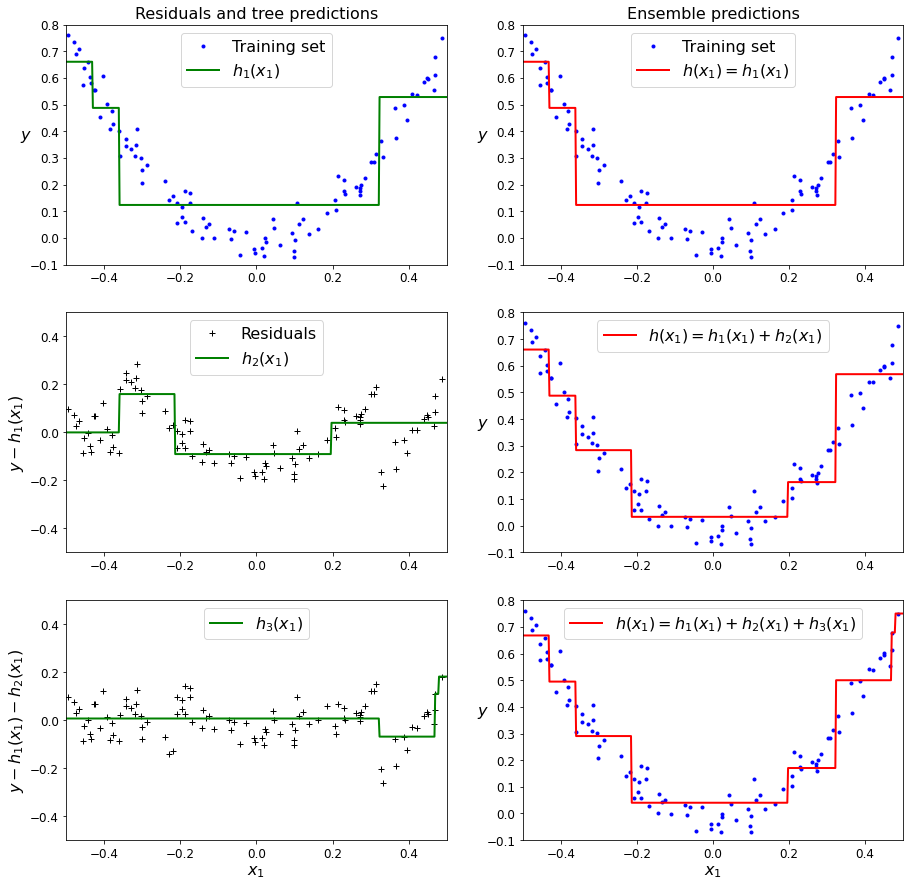

In [77]:
# Let's plot how these two models fit to the training data at each stage 

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
    
plt.figure(figsize=(15,15))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

Example of how we can use early stopping to find the optimal number of trees to use so that we don't overfit the mode

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

In [80]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120)

In [81]:
errors = [mean_squared_error(y_val, y_pred)
         for y_pred in gbrt.staged_predict(X_val)] # staged_predict returns an iterator over the predictions made by the ensemble at each stage (tree) of the training
bst_n_estimators = np.argmin(errors) + 1

In [83]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=70)

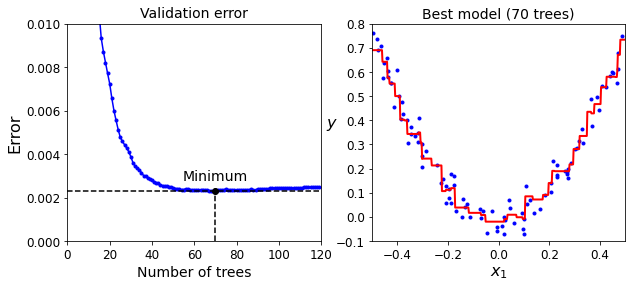

In [84]:
# Let's visualize the validation error and the best model's fit

min_error = np.min(errors)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [85]:
# Let's train another time using early stopping but stop once we find the minimum error automatically 

gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

In [86]:
gbrt

GradientBoostingRegressor(max_depth=2, n_estimators=66, warm_start=True)

### XGBoost

In [89]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

y_xgb_pred = xgb_reg.predict(X_val)

In [92]:
y_xgb_pred

array([ 0.5399436 ,  0.5816475 ,  0.16418618,  0.5549481 ,  0.21374498,
        0.2139441 , -0.0619216 ,  0.12453668, -0.05881556,  0.6384903 ,
        0.12453668,  0.17877889,  0.40750092,  0.03588782,  0.5549481 ,
        0.70629466,  0.40750092,  0.36980048,  0.70629466,  0.5026478 ,
        0.03729475,  0.14048374,  0.70629466,  0.06251779,  0.2837859 ],
      dtype=float32)

In [96]:
y_val

array([ 0.53736176,  0.60427162,  0.19877932,  0.45490008,  0.16605161,
        0.14074072,  0.02295508,  0.05233922, -0.04067503,  0.57448344,
        0.06929893,  0.19175712,  0.4268297 , -0.02642212,  0.55592656,
        0.68951556,  0.47522862,  0.34398593,  0.73528779,  0.60876529,
        0.01573206,  0.10479474,  0.75962221,  0.15534206,  0.31339697])

In [97]:
# Early stopping is easy with XGBoost

xgb_reg.fit(X_train, y_train,
           eval_set=[(X_val, y_val)], early_stopping_rounds=2)

y_pred = xgb_reg.predict(X_val)

y_pred

[0]	validation_0-rmse:0.22709
[1]	validation_0-rmse:0.17088
[2]	validation_0-rmse:0.13266
[3]	validation_0-rmse:0.10603
[4]	validation_0-rmse:0.08793
[5]	validation_0-rmse:0.07539
[6]	validation_0-rmse:0.06511
[7]	validation_0-rmse:0.05926
[8]	validation_0-rmse:0.05582
[9]	validation_0-rmse:0.05352
[10]	validation_0-rmse:0.05235
[11]	validation_0-rmse:0.05179
[12]	validation_0-rmse:0.05150
[13]	validation_0-rmse:0.05110
[14]	validation_0-rmse:0.05083
[15]	validation_0-rmse:0.05115
[16]	validation_0-rmse:0.05068
[17]	validation_0-rmse:0.05079
[18]	validation_0-rmse:0.05063
[19]	validation_0-rmse:0.05078


array([ 0.5388735 ,  0.58033967,  0.17828226,  0.55364025,  0.1969848 ,
        0.2186291 , -0.04729082,  0.10270364, -0.04729082,  0.6383504 ,
        0.10270364,  0.18401147,  0.40711033,  0.03439138,  0.55364025,
        0.696694  ,  0.40711033,  0.35395926,  0.696694  ,  0.50156087,
        0.05922448,  0.13983522,  0.696694  ,  0.09417783,  0.28424406],
      dtype=float32)